<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/DS_4_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 회귀분석 예제
* 특정한 입력변수값을 사용하여 출력변수의 값을 계산하는 것을 예측(prediction)문제라고 한다. 예측문제 중에서 출력변수의 값이 연속값인 문제를 회귀(regression) 또는 회귀분석(regression analysis) 문제라고 한다. 이 절에서는 회귀분석의 몇가지 예를 들어본다.

## 보스턴 집값 예측
* sklearn 패키지의 datasets 서브패키지는 회귀분석을 공부하기 위한 예제를 제공한다. 그 중 load_boston() 명령으로 받을 수 있는 보스턴 주택 가격 데이터는 다음과 같은 데이터이다. 보스턴의 506개 타운(town)의 13개 독립변수값로부터 해당 타운의 주택가격 중앙값을 예측하는 문제다. 사용할 수 있는 특징 데이터는 다음과 같다.

독립변수
* CRIM: 범죄율
* INDUS: 비소매상업지역 면적 비율
* NOX: 일산화질소 농도
* RM: 주택당 방 수
* LSTAT: 인구 중 하위 계층 비율
* B: 인구 중 흑인 비율
* PTRATIO: 학생/교사 비율
* ZN: 25,000 평방피트를 초과 거주지역 비율
* CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
* AGE: 1940년 이전에 건축된 주택의 비율
* RAD: 방사형 고속도로까지의 거리
* DIS: 직업센터의 거리
* TAX: 재산세율
* 종속변수
* 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import statsmodels.api as sm

from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [ ]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


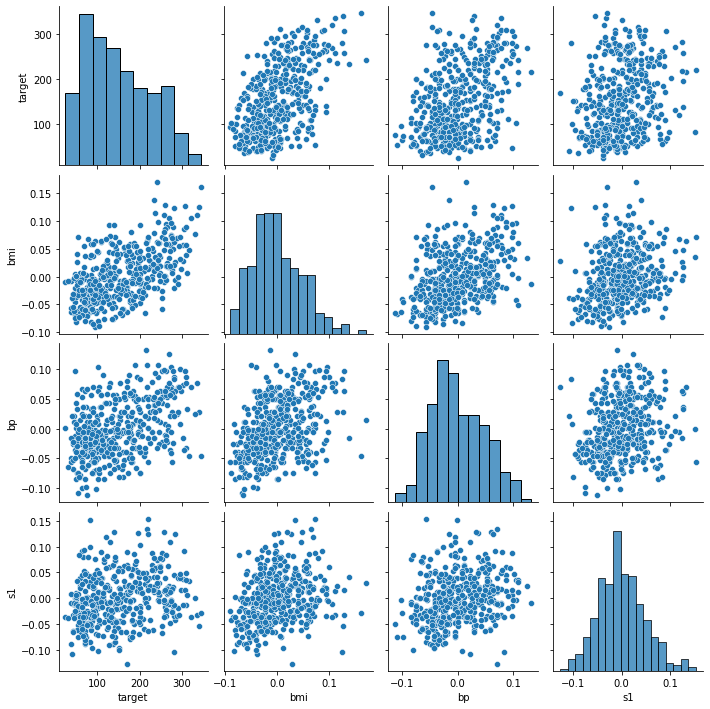

In [ ]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()

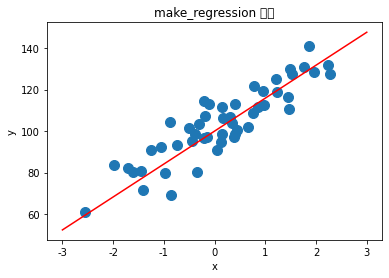

In [75]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제")
plt.show()

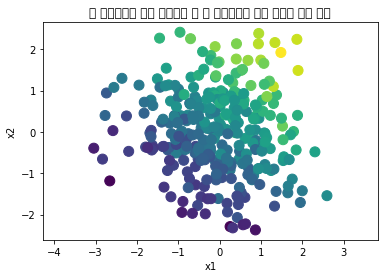

In [ ]:
X, y, w = make_regression(n_samples=300, n_features=3, noise=10, coef=True, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 다 종속변수와 상관 관계가 있는 경우")
plt.show()

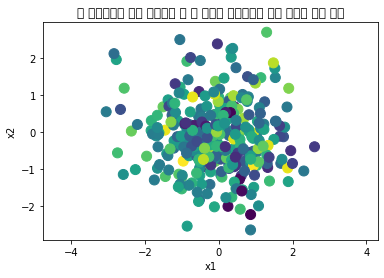

In [ ]:
X, y, w = make_regression(n_samples=300, n_features=3, n_informative=1, noise=0, coef=True, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 중 하나만 종속변수와 상관 관계가 있는 경우")
plt.show()

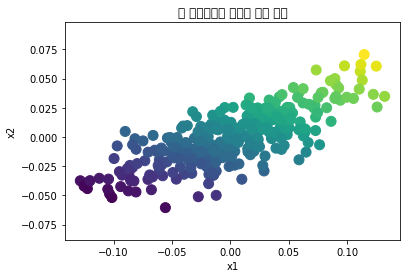

In [ ]:
 #두 독립변수가 서로 독립이 아니고 상관관계를 가지는 다중공선성 데이터를 만드는 경우 tail_strength=0
X, y, w = make_regression(n_samples=300, n_features=3, effective_rank=1, noise=0, coef=True, random_state=0, tail_strength=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 독립이 아닌 경우")
plt.show()

# 4.2 선형회귀분석의 기초

## 상수항 결합
* 회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 상수항 결합(bias augmentation)작업

In [ ]:
X0 = np.arange(10).reshape(5, 2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [ ]:
X = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

## 최소자승법
* 최소자승법(OLS: Ordinary Least Squares)는 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 구하는 방법이다.

In [ ]:
bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [ ]:
w

array(86.44794301)

y = 100+86.44794301x + ϵ

In [ ]:
# OLS 해를 직접 이용하는 방법
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

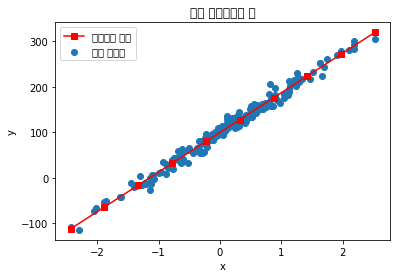

In [ ]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show()

In [77]:
from sklearn.linear_model import LinearRegression

X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)

model = LinearRegression().fit(X0, y)
print(model.intercept_, model.coef_)

99.79150868986946 [86.96171201]


In [78]:
model.predict([[-2], [-1], [0], [1], [2]])

array([-74.13191534,  12.82979668,  99.79150869, 186.7532207 ,
       273.71493272])

In [90]:
df = pd.DataFrame({"x": X0[:, 0], "y": y})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [91]:
dfy = df[["y"]]
dfX = sm.add_constant(df[["x"]])
model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 31 May 2022   Prob (F-statistic):          8.17e-182
Time:                        01:38:40   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

In [93]:
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 31 May 2022   Prob (F-statistic):          8.17e-182
Time:                        01:39:34   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [95]:
result.predict({"x": [-2, -1, 0, 1, 2] })

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

In [96]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

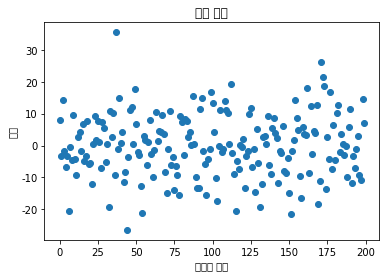

In [97]:
result.resid.plot(style="o")
plt.title("잔차 벡터")
plt.xlabel("데이터 번호")
plt.ylabel("잔차")
plt.show()

In [110]:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns = boston.feature_names)
X1 = sm.add_constant(X)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

model_boston1 = sm.OLS(y, X1)
result = model_boston1.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 31 May 2022   Prob (F-statistic):          6.72e-135
Time:                        01:55:12   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [115]:
from sklearn.datasets import load_boston

boston = load_boston()

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = pd.DataFrame(boston.target)

model_boston2 = sm.OLS.from_formula("MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS+RAD + PTRATIO + B + LSTAT", data=df)
result2 = model_boston2.fit()

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.7
Date:                Tue, 31 May 2022   Prob (F-statistic):          1.84e-135
Time:                        02:01:31   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3079.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.7123      5.103      6.803      0.0

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

boston = load_boston()

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.drop(columns=['INDUS','AGE'])
df

X_train, X_test, y_train, y_test = train_test_split(df, boston.target, test_size=0.2)

model_boston3 = LinearRegression()
model_boston3.fit(X_train, y_train)
predict = model_boston3.predict(X_test)

print(model_boston3.score(X_train, y_train))
print(model_boston3.score(X_test, y_test))

0.7586068516535048
0.6692029083791567


In [147]:
scores = cross_val_score(model_boston3, df, boston.target, cv=10, scoring='r2')
print("NMSE scores:{}".format(scores))
print("NMSE scores mean:{}".format(scores.mean()))
print("NMSE scores std:{}".format(scores.std()))

NMSE scores:[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
NMSE scores mean:0.20252899006055863
NMSE scores std:0.5952960169512364


In [158]:
scores = cross_val_score(model_boston3, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')
print("NMSE scores:{}".format(scores))
print("NMSE scores mean:{}".format(scores.mean()))
print("NMSE scores std:{}".format(scores.std()))

NMSE scores:[  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
NMSE scores mean:-34.705255944524914
NMSE scores std:45.57399920030867


## 모델 성능 평가

### Classification
* accuracy
* balanced_accuracy
* top_k_accuracy
* average_precision
* neg_brier_score
* f1
* f1_micro
* f1_macro
* f1_weighted
* f1_samples
* neg_log_loss
* precision
* recall
* jaccard
* roc_auc
* roc_auc_ovr
* roc_auc_ovo
* roc_auc_ovr_weighted
* roc_auc_ovo_weighted

### Regression
* explained_variance
* max_error
* neg_mean_absolute_error
* neg_root_mean_squared_error
* neg_mean_squared_log_error
* r2
* neg_mean_poisson_deviance
* neg_mean_gamma_deviance
* neg_mean_absolute_percentage_error

### Clustering
* adjusted_mutual_info_score
* adjusted_rand_score
* completeness_score
* fowlkes_mallows_score
* homogeneity_score
* mutual_info_score
* normalized_mutual_info_score
* rand_score
* v_measure_score

# 4.3 스케일링
## 회귀분석과 조건수
* 회귀분석에서 조건수가 커지는 경우는 크게 두 가지가 있다.
  * 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우. 이 경우에는 스케일링(scaling)으로 해결한다.
  * 다중 공선성 즉, 상관관계가 큰 독립 변수들이 있는 경우, 이 경우에는 변수 선택이나 PCA를 사용한 차원 축소 등으로 해결한다.

In [160]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

dfX2 = dfX.copy()
df2 = pd.concat([dfX2, dfy], axis=1)

dfX.describe().loc["std"]

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

In [185]:
feature_names = list(boston.feature_names)
feature_names.remove("CHAS") 

#테고리 더미변수인 CHAS는 스케일을 하지 않는다
feature_names = ["scale({})".format(name) for name in feature_names] + ["CHAS"]
model3 = sm.OLS.from_formula("MEDV ~ " + "+".join(feature_names), data=df2)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 31 May 2022   Prob (F-statistic):          6.72e-135
Time:                        03:40:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3470      0.219    101.

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

boston = load_boston()

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.drop(columns=['INDUS','AGE'])

#df_s = df.copy()
#df_s.drop(columns='CHAS')

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

model_boston3 = LinearRegression()
model_boston3.fit(X_train_scaler, y_train)
predict = model_boston3.predict(X_test_scaler)

print(model_boston3.score(X_train_scaler, y_train))
print(model_boston3.score(X_test_scaler, y_test))

0.7368594203048766
0.7419094857614423


# 4.4 범주형 독립변수

## 풀랭크 방식
* 풀랭크(full-rank) 방식에서는 더미변수의 값을 원핫인코딩(one-hot-encoding) 방식으로 지정한다.
* pd.get_dummies

## 축소랭크 방식
* 축소랭크(reduced-rank) 방식에서는 특정한 하나의 범주값을 기준값(reference, baseline)으로 하고 기준값에 대응하는 더미변수의 가중치는 항상 1으로 놓는다.

In [223]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
dfX.drop(columns = ['INDUS', 'AGE'])

df_boston = pd.concat([dfX, dfy], axis=1)

feature_names = list(dfX.columns)
feature_names.remove("CHAS") 
feature_names = [name for name in feature_names] + ["C(CHAS)"]
model2 = sm.OLS.from_formula("MEDV ~ 0 + " + "+".join(feature_names), data=df_boston)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 31 May 2022   Prob (F-statistic):          6.72e-135
Time:                        04:30:05   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(CHAS)[0.0]    36.4595      5.103      7.144   

# 4.5 부분회귀
* 만약 회귀분석을 한 후에 새로운 독립변수를 추가하여 다시 회귀분석을 한다면 그 전에 회귀분석으로 구했던 가중치의 값은 변할까 변하지 않을까? 일반적으로 w′1의 값은 원래의 w1의 값과 다르다. 로운 독립변수 그룹 X2를 추가해서 다시 회귀분석을 한다면 기존 가중치 벡터의 값이 달라진다.

## 프리슈-워-로벨 정리
* 프리슈-워-로벨(Frisch–Waugh–Lovell) 정리 혹은 FWL 정리는 위 결과를 다른 방식으로 표현한 것

## 부분회귀 플롯
립변수의 갯수가 많을 때 특정한 하나의 독립변수의 영향력을 시각화하는 방법이 부분회귀 플롯(Partial Regression Plot) 이다. Added Variable Plot이라고도 한다.


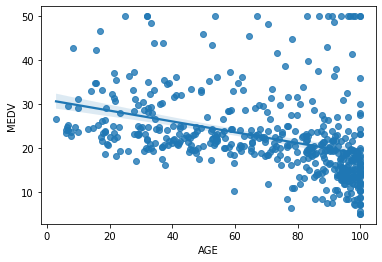

In [225]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
sns.regplot(x="AGE", y="MEDV", data=df)
plt.show()

plot_partregress(endog, exog_i, exog_others, data=None, obs_labels=True, ret_coords=False)
* endog: 종속변수 문자열
* exog_i: 분석 대상이 되는 독립변수 문자열
* exog_others: 나머지 독립변수 문자열의 리스트
* data: 모든 데이터가 있는 데이터프레임
* obs_labels: 데이터 라벨링 여부
* ret_coords: 잔차 데이터 반환 여부

['RAD', 'INDUS', 'LSTAT', 'DIS', 'ZN', 'RM', 'CHAS', 'PTRATIO', 'const', 'CRIM', 'B', 'NOX', 'TAX']


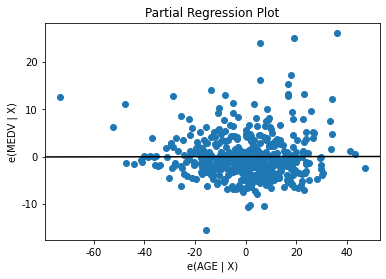

In [228]:
others = list(set(df.columns).difference(set(["MEDV", "AGE"])))
print(others)
p, resids = sm.graphics.plot_partregress(
    "MEDV", "AGE", others, data=df, obs_labels=False, ret_coords=True
)
plt.show()

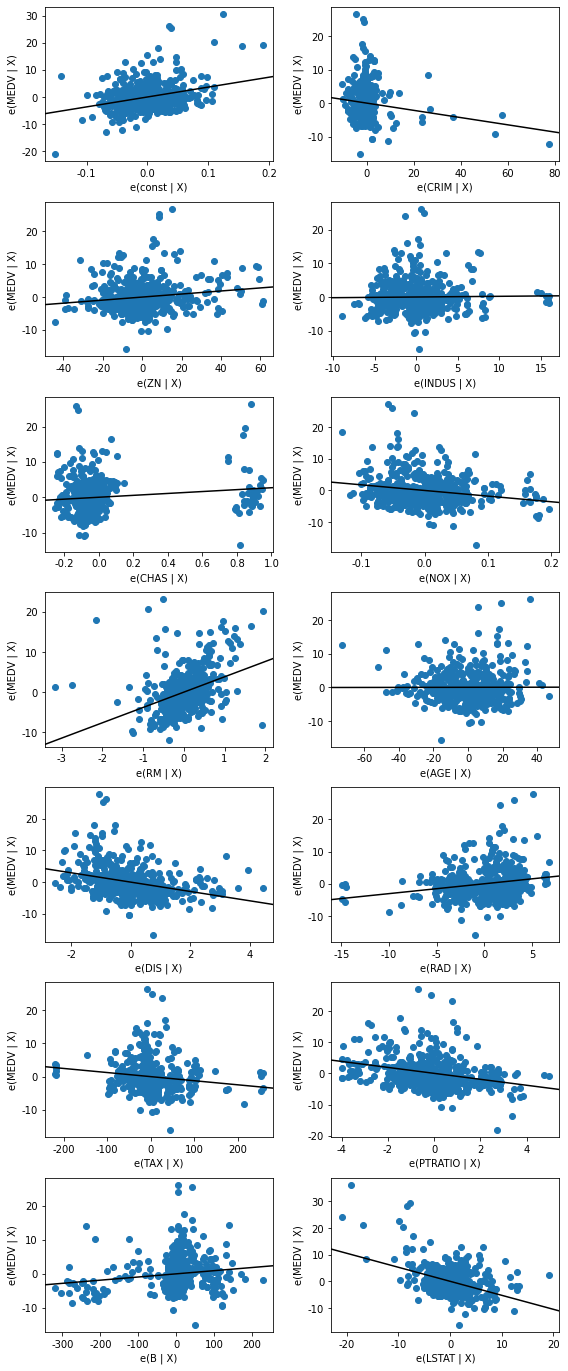

In [229]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

## CCPR 플롯
* CCPR(Component-Component plus Residual) 플롯도 부분회귀 플롯과 마찬가지로 특정한 하나의 변수의 영향을 살펴보기 위한 것이다.

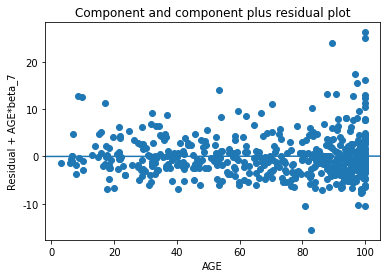

In [230]:
sm.graphics.plot_ccpr(result_boston, "AGE")
plt.show()

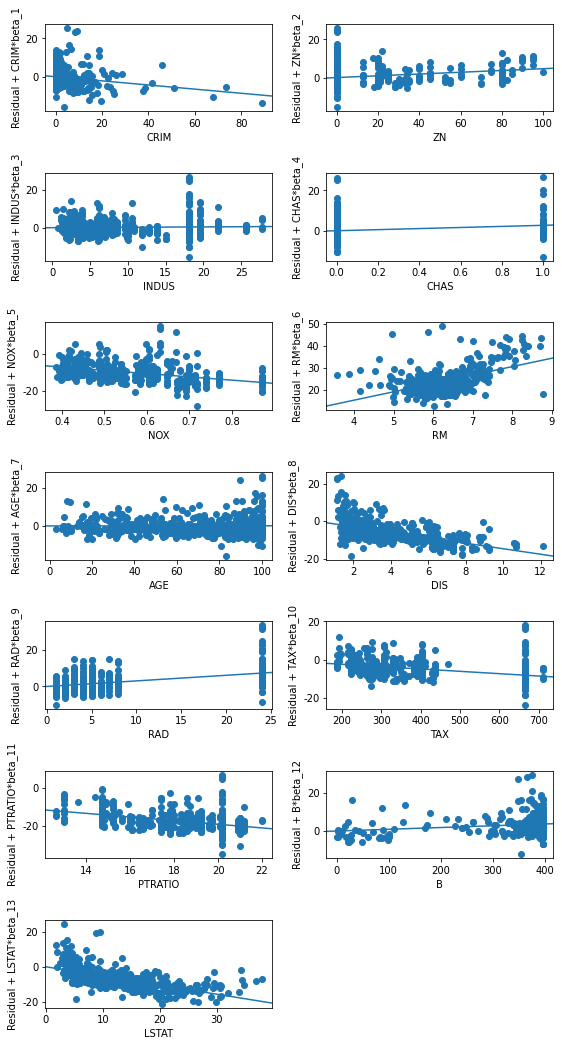

In [231]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

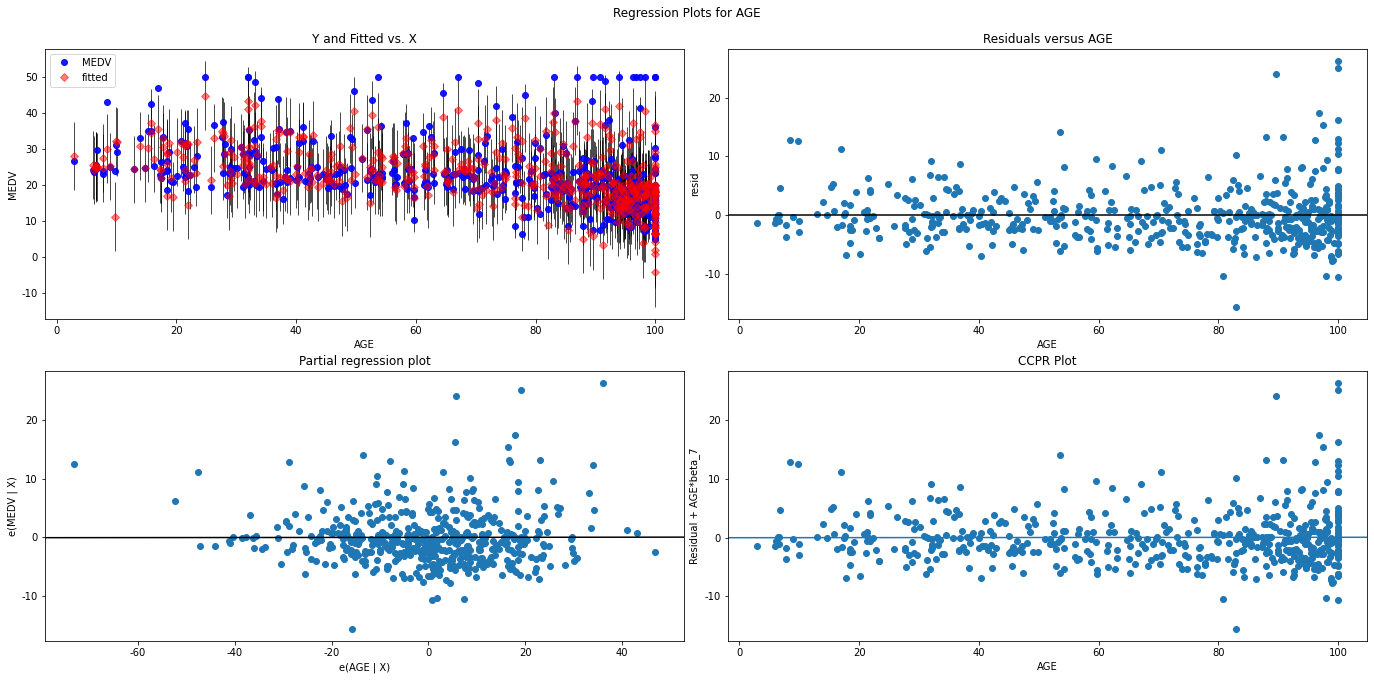

In [244]:
fig = plt.figure(figsize=(20, 10))
fig = sm.graphics.plot_regress_exog(result_boston, "AGE", fig=fig)
plt.tight_layout(pad=4, h_pad=0.5, w_pad=0.5)
plt.show()